In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold #Something to split and randomise the data 

from sklearn.neighbors import KNeighborsClassifier #Importing knn model

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('Credit/creditdefault_train.csv') #Putting the test data and the train data in data frames 
test = pd.read_csv('Credit/creditdefault_test.csv')

#Seperating the train data labels from the inputs:
y_train = data['Y']
x_train = data.drop(['Y'],axis=1)

#Seperating the test data labels from the inputs:
y_test = test['Y']
x_test = test.drop(['Y'],axis=1)

kf = StratifiedKFold(n_splits=3)
#kf = KFold(15000, n_folds=3)



In [3]:
def visualise(train_acc,train_d,train_p,test_acc,test_d,test_p,dependant_var,dependant_label):
    fig,axs = plt.subplots(3,1,figsize=(12,6))
    
    axs[0].plot(dependant_var,train_acc,'ro-',dependant_var,test_acc,'bv--')
    axs[0].legend(['Training Accuracy','Test Accuracy'])
    axs[0].set_xlabel(dependant_label)
    axs[0].set_ylabel('Accuracy')
    
    axs[1].plot(dependant_var,train_d,'ro-',dependant_var,test_d,'bv--')
    axs[1].legend(['Training default precision','Test default precision'])
    axs[1].set_xlabel(dependant_label)
    axs[1].set_ylabel('Default precision')
    
    axs[2].plot(dependant_var,train_p,'ro-',dependant_var,test_p,'bv--')
    axs[2].legend(['Training payment precision','Test payment precision'])
    axs[2].set_xlabel(dependant_label)
    axs[2].set_ylabel('payment precision')
    

In [12]:
    
def knn(neig,met='euclidean',q=2):   
    train_metrics_mean = np.zeros(3) #Place to store the mean of accuracy, defualt and payment precision 
    

    train_metrics = np.zeros((3,3)) #3x3 matrix to store current train accuracy 
    
    test_metrics = np.zeros(3)  #Place to store test accuracy of that model

    counter = 0
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds 

        #Taking the elements and putting them into array:
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)

        #Building model
        if(met == 'minkowski'):
            knn = KNeighborsClassifier(n_neighbors=neig,metric=met,p=q,n_jobs=-2)
        
        else:
            knn = KNeighborsClassifier(n_neighbors=neig,metric=met,n_jobs=-2)
        
        #Fitting model
        knn.fit(temp_train_x,temp_train_y)
        #Creating predictions
        pred = knn.predict(temp_train_x)
        
        #Storing the metrics of current fold
        train_metrics[counter][0] = accuracy_score(pred,temp_train_y)
        train_metrics[counter][1] = precision_score(pred,temp_train_y)
        train_metrics[counter][2] = precision_score(pred,temp_train_y,pos_label=0)
        
        counter+=1
    
    #Working out the mean of the outputs
    train_metrics_mean = np.mean(train_metrics,axis=0)  ## Working out the mean
    
    #Tesing on the full data set and test set
    if(met == 'minkowski'):
        main_knn = KNeighborsClassifier(n_neighbors=neig,metric=met,p=q,n_jobs=-2)
    else:
        main_knn = KNeighborsClassifier(n_neighbors=neig,metric=met,n_jobs=-2)
        
    main_knn.fit(x_train,y_train)
    
    prediction = main_knn.predict(x_test)
    #Storing the metrics on test set
    test_metrics[0] = accuracy_score(prediction,y_test)
    test_metrics[1] = precision_score(prediction,y_test)
    test_metrics[2] = precision_score(prediction,y_test,pos_label=0)
    
    return (train_metrics_mean,test_metrics) #Returning two arrays filled with elements
    
    

Whats consuming the most time is the fitting of the data.

## Manhattan

In [5]:
#Places to store the metrics to judge by:
train_manhattan_acc = []  #Train accuracy score 
train_manhattan_d = []    #Train Default precision
train_manhattan_p = []    #Train payment precision


test_manhattan_acc = []    #Test accuracy score 
test_manhattan_d = []      #Test default precision
test_manhattan_p = []      #Test Payment precison



In [6]:
for i in range(1,31): #Going through 1-30 neigbours
    train,test = knn(i) #Building the model with different hyperparameters

    #Storing the elements in the different arrays:
    #Train elements
    train_manhattan_acc.append(train[0])
    train_manhattan_d.append(train[1])
    train_manhattan_p.append(train[2])
    
    #Test elements
    test_manhattan_acc.append(test[0])
    test_manhattan_d.append(test[1])
    test_manhattan_p.append(test[2])

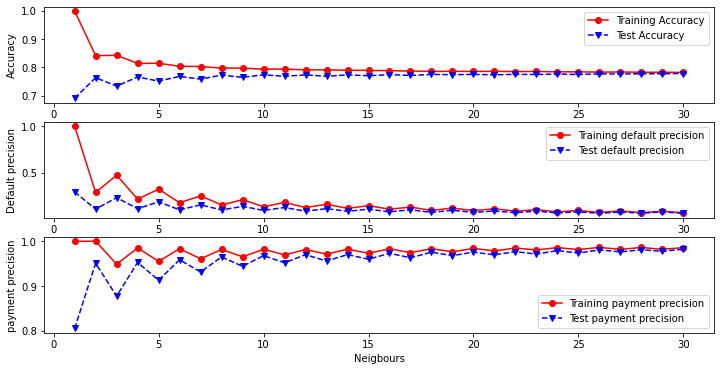

In [7]:
visualise(train_manhattan_acc,train_manhattan_d,train_manhattan_p,
          test_manhattan_acc,test_manhattan_d,test_manhattan_p,range(1,31),'Neigbours')

Testing overfits immediately when it comes to precision for defaults

## Euclidean

In [8]:
#Places to store the metrics to judge by:
train_euclidean_acc = []  #Train accuracy score 
train_euclidean_d = []    #Train Default precision
train_euclidean_p = []    #Train payment precision


test_euclidean_acc = []    #Test accuracy score 
test_euclidean_d = []      #Test default precision
test_euclidean_p = []      #Test Payment precison


In [9]:
for i in range(1,31): #Going through 1-30 neigbours
    train,test = knn(i,'euclidean') #Building the model with different hyperparameters

    #Storing the elements in the different arrays:
    #Train elements
    train_euclidean_acc.append(train[0])
    train_euclidean_d.append(train[1])
    train_euclidean_p.append(train[2])
    
    #Test elements
    test_euclidean_acc.append(test[0])
    test_euclidean_d.append(test[1])
    test_euclidean_p.append(test[2])

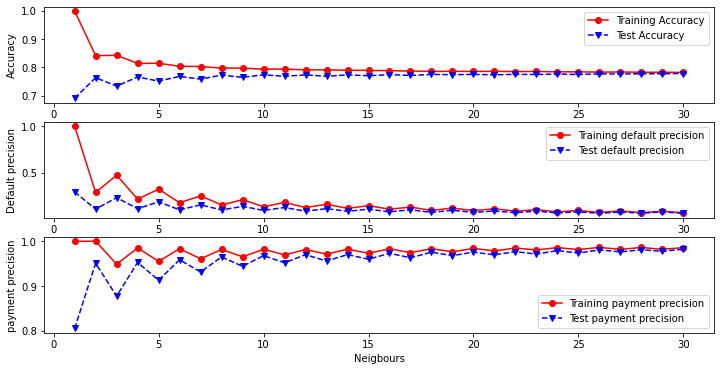

In [10]:
visualise(train_euclidean_acc,train_euclidean_d,train_euclidean_p,
          test_euclidean_acc,test_euclidean_d,test_euclidean_p,range(1,31),'Neigbours')

# Minkowski 

In [20]:
def minkow(q):
    #Places to store the metrics to judge by:
    train_mink_acc = []  #Train accuracy score 
    train_mink_d = []    #Train Default precision
    train_mink_p = []    #Train payment precision


    test_mink_acc = []    #Test accuracy score 
    test_mink_d = []      #Test default precision
    test_mink_p = []      #Test Payment precison

    for i in range(1,31): #Going through 1-30 neigbours
        train,test = knn(i,'minkowski',q) #Building the model with different hyperparameters

        #Storing the elements in the different arrays:
        #Train elements
        train_mink_acc.append(train[0])
        train_mink_d.append(train[1])
        train_mink_p.append(train[2])

        #Test elements
        test_mink_acc.append(test[0])
        test_mink_d.append(test[1])
        test_mink_p.append(test[2])

    visualise(train_mink_acc,train_mink_d,train_mink_p,
              test_mink1_acc,test_mink1_d,test_mink1_p,range(1,31),'Neigbours')
    
    #return (train_mink_acc,train_mink_d,train_mink_p,
     #         test_mink1_acc,test_mink1_d,test_mink1_p)


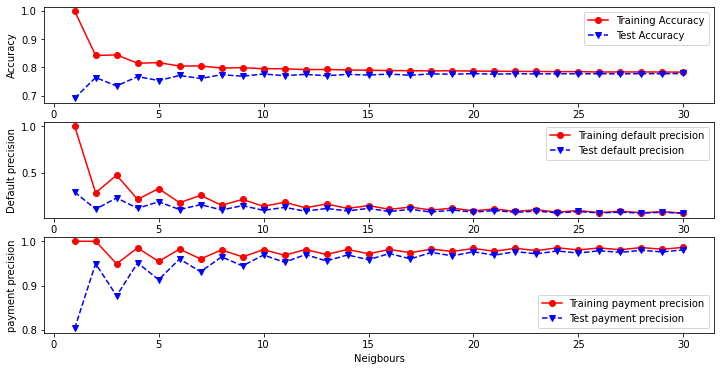

In [21]:
minkow(1)

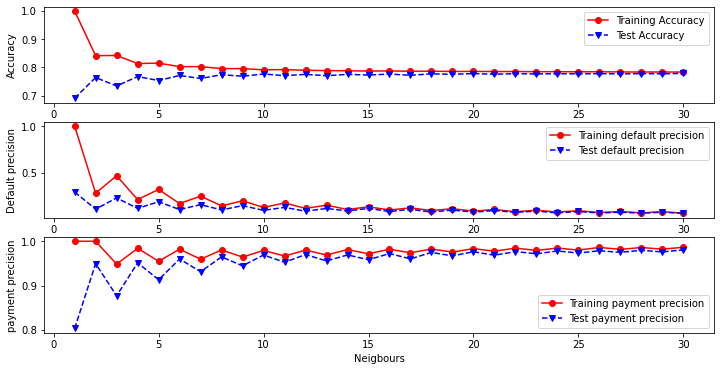

In [22]:
minkow(5)

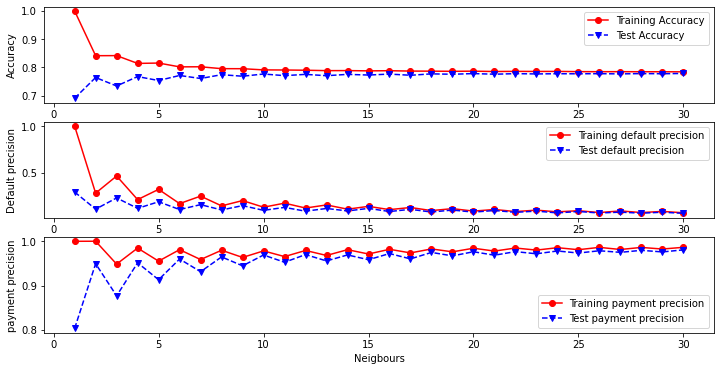

In [23]:
minkow(10)

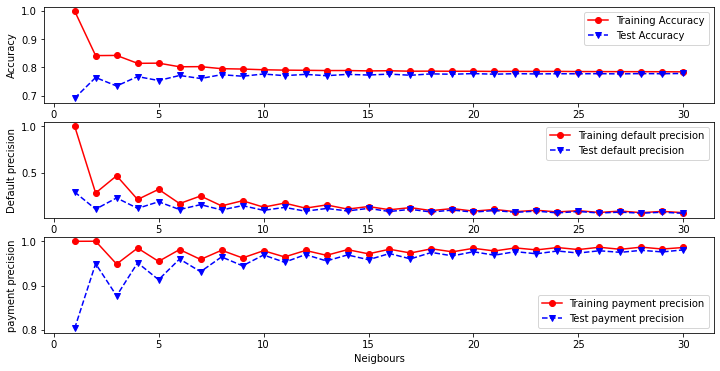

In [24]:
minkow(15)

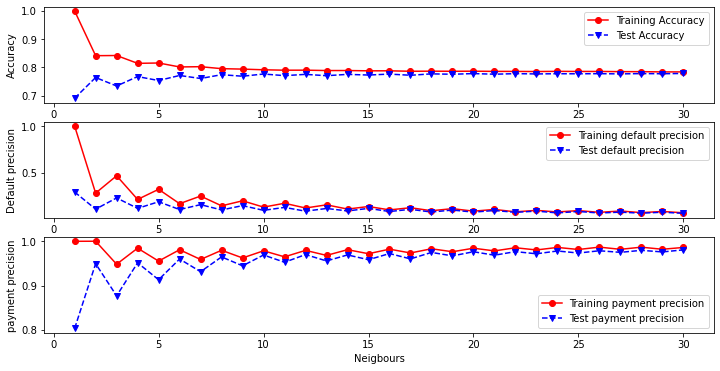

In [25]:
minkow(20)